# Band Stop Filter

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
from thinkdsp import play_wave
#play_wave(filename='temp.wav', player='aplay')
from thinkdsp import read_wave
from thinkdsp import decorate

## Original Audio

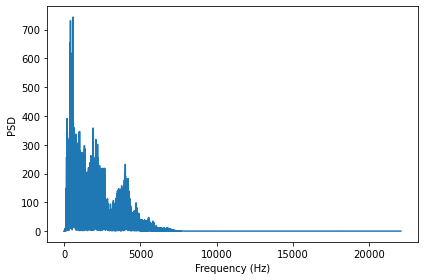

In [3]:
wave = read_wave(r'original_data.wav')
spect=wave.make_spectrum()
spect.plot()
decorate(xlabel='Frequency (Hz)',ylabel='PSD')
wave.make_audio()

## Noisy Data

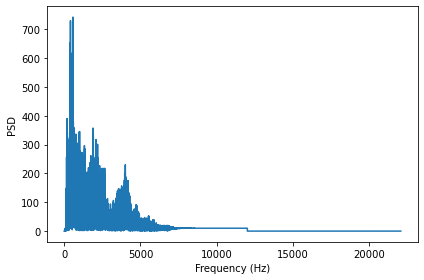

In [4]:
noisyWave = read_wave(r'noisy1.wav')
#noisyWave = read_wave(r'noisy2.wav')
#noisyWave = read_wave(r'noisy3.wav')
spect=noisyWave.make_spectrum()
spect.plot()
decorate(xlabel='Frequency (Hz)',ylabel='PSD')
noisyWave.make_audio()

# Filtering

In [5]:
import matplotlib.pyplot as plt
from IPython.display import display

def filterBandstop(wave, start, duration, low_cutoff, high_cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.band_stop(low_cutoff, high_cutoff)
    spectrum.plot(color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    plt.show()
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [6]:
from ipywidgets import interact, fixed

#wave 
interact(filterBandstop, wave=fixed(noisyWave), 
         start=(0, 5, 0.1), duration=(0, 8, 0.1), low_cutoff=(0, 12000, 100), high_cutoff=(0, 12000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=4.0, description…